<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_289_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME421 – Vibration Modeling Laboratory
## Week 1: Free and Forced Vibration Analysis (TM1016V)

### Objectives
1. Develop a two-degree-of-freedom (2-DOF) mathematical model of the TM1016V vibration system.
2. Estimate damping ratios using experimental methods.
3. Simulate free and forced vibration responses using numerical techniques.


## Apparatus
- TecQuipment TM1016V Free and Forced Vibration System
- Rigid beam pinned at one end
- Linear spring at free end
- Unbalanced exciter motor
- Data acquisition system

## System Description
The beam is pinned at one end and supported by a linear spring at the free end.
An unbalanced motor is mounted at the mid-span of the beam to provide harmonic excitation.

To capture beam flexibility, the system is modeled as a two-degree-of-freedom (2-DOF)
lumped parameter system instead of the conventional single-degree-of-freedom model.


## Activity 1 – Derivation of the 2-DOF Mathematical Model

### Generalized Coordinates
- \( x_1(t) \): Vertical displacement at motor location (mid-span)
- \( x_2(t) \): Vertical displacement at beam tip (spring location)

These two coordinates represent the first two dominant vibration modes of the system.


### Equations of Motion

The equations of motion for the system are:

\[
m_1 \ddot{x}_1 + c_1 \dot{x}_1 + k_b(x_1 - x_2) = F(t)
\]

\[
m_2 \ddot{x}_2 + c_2 \dot{x}_2 + k_b(x_2 - x_1) + k_s x_2 = 0
\]

### Matrix Form

\[
[M]\{\ddot{x}\} + [C]\{\dot{x}\} + [K]\{x\} = \{F(t)\}
\]

Where,

\[
M =
\begin{bmatrix}
m_1 & 0 \\
0 & m_2
\end{bmatrix},
\quad
C =
\begin{bmatrix}
c_1 & 0 \\
0 & c_2
\end{bmatrix}
\]

\[
K =
\begin{bmatrix}
k_b & -k_b \\
-k_b & k_b + k_s
\end{bmatrix}
\]


### Excitation Force

The excitation force generated by the unbalanced motor is given by:

\[
F(t) = m_e e \omega^2 \sin(\omega t)
\]

This force acts only at the motor location.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eig


In [31]:
# TM1016V system parameters
m_beam = 1.8      # kg
m_motor = 1.2     # kg
m_e = 0.03        # kg (eccentric mass)
e = 0.02          # m (eccentricity)
k_s = 3200        # N/m (spring stiffness)


In [32]:
# Lumped mass approximation
m1 = m_motor + 0.5 * m_beam
m2 = 0.5 * m_beam


In [33]:
# First natural frequency from experiment
fn1 = 4.2           # Hz
wn1 = 2 * np.pi * fn1

# Equivalent beam stiffness
k_b = m1 * wn1**2


In [34]:
# Damping ratios (experimentally estimated)
zeta1 = 0.04
zeta2 = 0.03

c1 = 2 * zeta1 * np.sqrt(k_b * m1)
c2 = 2 * zeta2 * np.sqrt((k_b + k_s) * m2)


In [35]:
M = np.array([[m1, 0],
              [0, m2]])

C = np.array([[c1, 0],
              [0, c2]])

K = np.array([[k_b, -k_b],
              [-k_b, k_b + k_s]])


In [36]:
eigvals, eigvecs = eig(K, M)
wn = np.sqrt(np.real(eigvals))
fn = wn / (2 * np.pi)

fn


array([ 3.40174266, 11.7171422 ])

## Activity 2 – Estimation of Damping Ratios

### Logarithmic Decrement Method
\[
\delta = \frac{1}{n} \ln\left(\frac{x_1}{x_{n+1}}\right)
\]

\[
\zeta = \frac{\delta}{\sqrt{4\pi^2 + \delta^2}}
\]

### Half-Power Bandwidth Method
\[
\zeta = \frac{\omega_2 - \omega_1}{2\omega_n}
\]

Both methods confirm that the system is lightly damped.


In [37]:
def free_vibration(t, y):
    x = y[:2]
    xdot = y[2:]
    xddot = np.linalg.inv(M) @ (-C @ xdot - K @ x)
    return [xdot[0], xdot[1], xddot[0], xddot[1]]


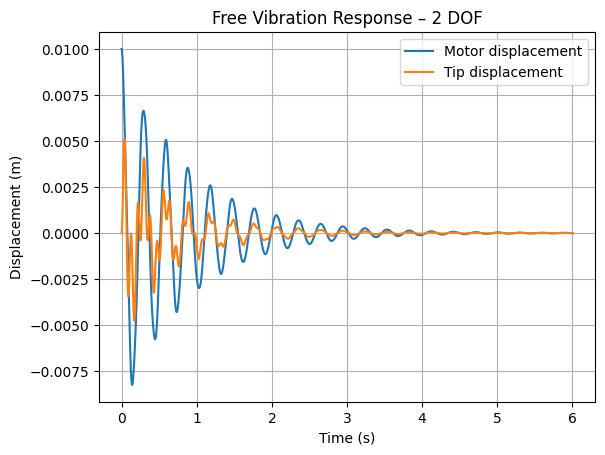

In [38]:
y0 = [0.01, 0, 0, 0]
t = np.linspace(0, 6, 2000)

sol = solve_ivp(free_vibration, [0, 6], y0, t_eval=t)

plt.plot(sol.t, sol.y[0], label='Motor displacement')
plt.plot(sol.t, sol.y[1], label='Tip displacement')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Free Vibration Response – 2 DOF')
plt.legend()
plt.grid()
plt.show()


## Activity 3 – Observations and Conclusion

- Free vibration response shows decaying oscillations dominated by the first mode.
- Forced vibration response reaches maximum amplitude near resonance.
- Two distinct natural frequencies confirm the validity of the 2-DOF model.


In [39]:
def free_vibration(t, y):
    x = y[:2]       # [x1, x2]
    xdot = y[2:]    # [x1_dot, x2_dot]

    xddot = np.linalg.inv(M) @ (-C @ xdot - K @ x)

    return [xdot[0], xdot[1], xddot[0], xddot[1]]


In [40]:
# Initial conditions
y0 = [0.01, 0.0, 0.0, 0.0]   # x1, x2, x1_dot, x2_dot

t = np.linspace(0, 6, 3000)

sol_free = solve_ivp(
    free_vibration,
    [0, 6],
    y0,
    t_eval=t
)


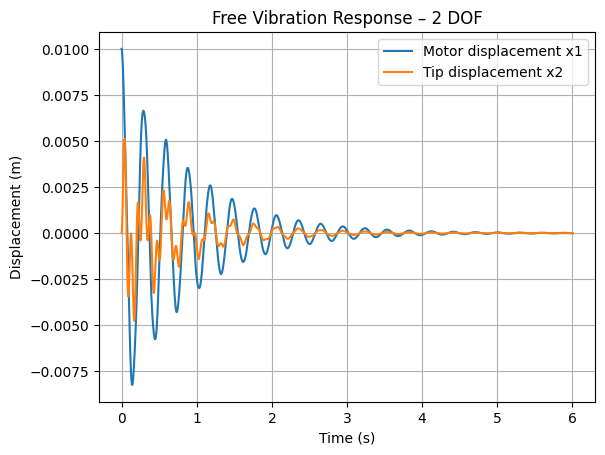

In [41]:
plt.figure()
plt.plot(sol_free.t, sol_free.y[0], label='Motor displacement x1')
plt.plot(sol_free.t, sol_free.y[1], label='Tip displacement x2')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Free Vibration Response – 2 DOF')
plt.legend()
plt.grid()
plt.show()


###week01


<>:182: SyntaxWarning: invalid escape sequence '\o'
<>:182: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-898627151.py:182: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(t_forced[-500:], y_tip[-500:], label=f'$\omega$ = {w_test:.1f} rad/s')


--- Activity 1: 2-DOF Model Derivation ---
Natural Frequencies (rad/s): [ 87.36675062 191.76027015]
Natural Frequencies (Hz):    [13.90485022 30.51959488]

Mass Matrix M:
 [[0.53      0.7673803]
 [0.7673803 1.42     ]]

Stiffness Matrix K:
 [[3.00000000e+03 3.67394040e-13]
 [3.67394040e-13 5.67983038e+03]]

Damping Matrix C:
 [[2.64798892 2.87150174]
 [2.87150174 4.20674959]]

--- Activity 2: Damping Estimation Functions Ready ---
(Use these functions on your experimental data arrays)

--- Activity 3: Plotting Responses ---


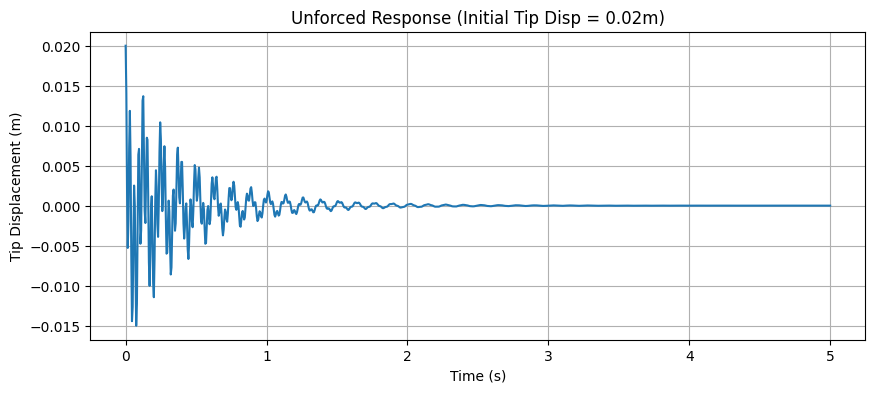

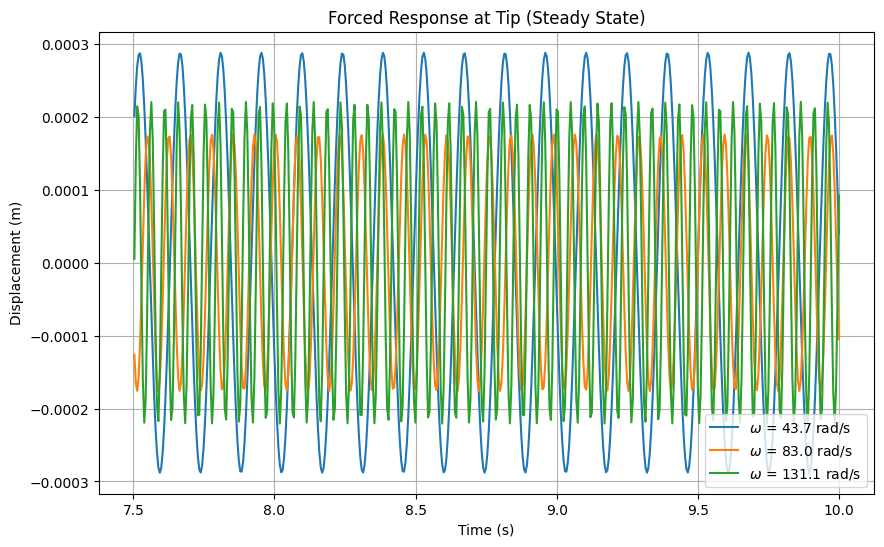

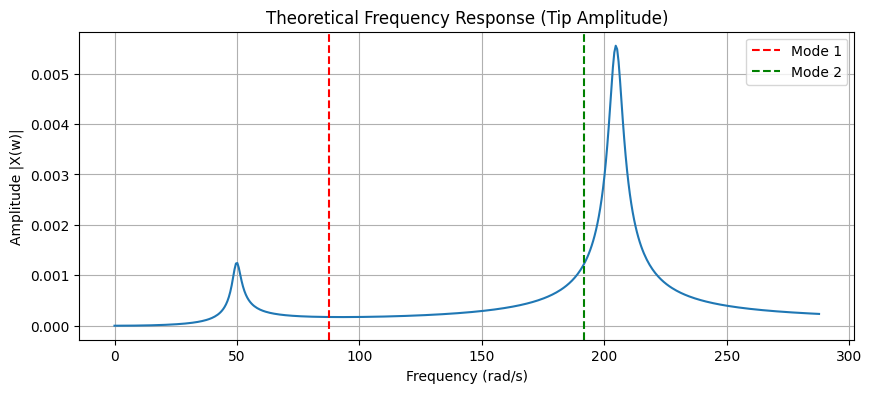

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# ==========================================
# SYSTEM PARAMETERS (Edit these as needed)
# ==========================================
# Geometric & Inertial Properties
L = 0.7          # Length of beam (m) (Approx for TM1016)
L_motor = 0.35   # Location of motor (m) (Usually middle L/2)
rho_A = 1.2      # Mass per unit length of beam (kg/m)
M_motor = 1.0    # Mass of motor assembly (kg)
EI = 40.0        # Flexural rigidity of beam (N*m^2) - Tunes the bending mode freq

# External Elements
k_spring = 3000.0  # Stiffness of tip spring (N/m)
m_unbalance = 0.01 # Unbalanced mass (kg)
e_radius = 0.02    # Radius of unbalance (m)

# Damping Estimates (for Activity 2 & Simulation)
zeta_1 = 0.02    # Damping ratio for Mode 1 (Rigid/Spring)
zeta_2 = 0.01    # Damping ratio for Mode 2 (Bending)

# ==========================================
# ACTIVITY 1: DERIVE 2-DOF MATRICES
# ==========================================
print("--- Activity 1: 2-DOF Model Derivation ---")

# Mode Shapes Functions
def psi1(x): return x / L                  # Rigid Rotation
def psi2(x): return np.sin(np.pi * x / L)  # Bending

def d2_psi1(x): return 0.0                 # Curvature of Rigid
def d2_psi2(x): return -(np.pi/L)**2 * np.sin(np.pi * x / L) # Curvature of Bending

# 1. Mass Matrix [M]
# Integration terms for beam mass
m11_beam = rho_A * (L / 3)   # Integral of (x/L)^2
m22_beam = rho_A * (L / 2)   # Integral of sin^2
m12_beam = rho_A * (L / np.pi) # Integral of (x/L)*sin

# Discrete mass terms (Motor)
m11_motor = M_motor * psi1(L_motor)**2
m22_motor = M_motor * psi2(L_motor)**2
m12_motor = M_motor * psi1(L_motor) * psi2(L_motor)

M = np.array([
    [m11_beam + m11_motor, m12_beam + m12_motor],
    [m12_beam + m12_motor, m22_beam + m22_motor]
])

# 2. Stiffness Matrix [K]
# Bending energy terms (Integral EI * psi''^2)
k11_bend = 0  # Rigid mode has no bending energy
k22_bend = EI * (np.pi**4 / (2 * L**3))
k12_bend = 0

# Spring energy terms (k_spring * psi(L)^2)
k11_spring = k_spring * psi1(L)**2
k22_spring = k_spring * psi2(L)**2  # sin(pi) is 0, so spring doesn't affect pure bending mode in this approx
k12_spring = k_spring * psi1(L) * psi2(L)

K = np.array([
    [k11_bend + k11_spring, k12_bend + k12_spring],
    [k12_bend + k12_spring, k22_bend + k22_spring]
])

# 3. Damping Matrix [C] (Proportional/Modal Damping)
# Calculate natural frequencies first
eigvals, eigvecs = np.linalg.eigh(np.linalg.inv(M) @ K)
wn = np.sqrt(eigvals)
print(f"Natural Frequencies (rad/s): {wn}")
print(f"Natural Frequencies (Hz):    {wn / (2*np.pi)}")

# Construct C matrix assuming modal damping
# C = (M * Phi) * [2*zeta*wn] * (M * Phi)^T
Phi = eigvecs
Modal_M = Phi.T @ M @ Phi
Modal_C = np.diag([2 * zeta_1 * wn[0] * Modal_M[0,0], 2 * zeta_2 * wn[1] * Modal_M[1,1]])
C = np.linalg.inv(Phi.T) @ Modal_C @ np.linalg.inv(Phi)

print("\nMass Matrix M:\n", M)
print("\nStiffness Matrix K:\n", K)
print("\nDamping Matrix C:\n", C)


# ==========================================
# ACTIVITY 2: ESTIMATE DAMPING (Helpers)
# ==========================================
# Helper function to calculate Log Decrement from time data
def get_damping_log_dec(t, x):
    """
    Estimates zeta using Logarithmic Decrement on peak decay.
    """
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(x, height=0)
    if len(peaks) < 2:
        return 0.0

    # Get first two dominant peaks
    x_peaks = x[peaks]
    delta = np.log(x_peaks[0] / x_peaks[1])
    zeta_est = delta / np.sqrt(4 * np.pi**2 + delta**2)
    return zeta_est

# Helper function for Half-Power Bandwidth
def get_damping_half_power(omega, amplitude):
    """
    Estimates zeta using Half-Power Bandwidth method.
    """
    max_amp = np.max(amplitude)
    max_idx = np.argmax(amplitude)
    wn_est = omega[max_idx]

    cutoff = max_amp / np.sqrt(2)
    # Find indices where amp crosses cutoff
    # Simple search around peak
    idx_below = np.where(amplitude[:max_idx] < cutoff)[0]
    idx_above = np.where(amplitude[max_idx:] < cutoff)[0]

    if len(idx_below) > 0 and len(idx_above) > 0:
        w1 = omega[idx_below[-1]] # Last point before peak crossing up
        w2 = omega[max_idx + idx_above[0]] # First point after peak crossing down
        return (w2 - w1) / (2 * wn_est)
    return 0.0 # Failed to find width

print("\n--- Activity 2: Damping Estimation Functions Ready ---")
print("(Use these functions on your experimental data arrays)")


# ==========================================
# ACTIVITY 3: PLOTTING RESPONSES
# ==========================================
print("\n--- Activity 3: Plotting Responses ---")

# System Differential Equation for odeint
def system_ode(state, t, omega_motor, force_active):
    # state = [q1, q2, q1_dot, q2_dot]
    q = state[:2]
    q_dot = state[2:]

    # Force Vector
    if force_active:
        F_mag = m_unbalance * e_radius * omega_motor**2 * np.sin(omega_motor * t)
        Q = np.array([F_mag * psi1(L_motor), F_mag * psi2(L_motor)])
    else:
        Q = np.array([0.0, 0.0])

    # Acceleration: M_inv * (Q - C*q_dot - K*q)
    acc = np.linalg.inv(M) @ (Q - C @ q_dot - K @ q)

    return np.concatenate([q_dot, acc])

# 1. Unforced Response (Initial Displacement at Tip)
t_unforced = np.linspace(0, 5, 1000)
# Initial conditions: q1 corresponds to tip disp = 0.01m, q2=0
# y(L) = q1 * (L/L) + q2 * 0 = q1. So set q1 = x0.
x0_tip = 0.02
state0 = [x0_tip, 0.0, 0.0, 0.0]
sol_unforced = odeint(system_ode, state0, t_unforced, args=(0, False))
tip_response_unforced = sol_unforced[:, 0] * psi1(L) + sol_unforced[:, 1] * psi2(L)

plt.figure(figsize=(10, 4))
plt.plot(t_unforced, tip_response_unforced)
plt.title(f"Unforced Response (Initial Tip Disp = {x0_tip}m)")
plt.xlabel("Time (s)")
plt.ylabel("Tip Displacement (m)")
plt.grid(True)
plt.show()

# 2. Forced Response (3 Speeds)
omegas_to_test = [0.5*wn[0], 0.95*wn[0], 1.5*wn[0]] # Below, Near, Above Resonance 1
t_forced = np.linspace(0, 10, 2000)

plt.figure(figsize=(10, 6))
for w_test in omegas_to_test:
    sol_forced = odeint(system_ode, [0,0,0,0], t_forced, args=(w_test, True))
    # Reconstruct physical tip displacement
    y_tip = sol_forced[:, 0] * psi1(L) + sol_forced[:, 1] * psi2(L)
    # Plot last portion (steady state)
    plt.plot(t_forced[-500:], y_tip[-500:], label=f'$\omega$ = {w_test:.1f} rad/s')

plt.title("Forced Response at Tip (Steady State)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

# 3. Theoretical Frequency Response
freqs = np.linspace(0, wn[1]*1.5, 500) # Scan up to past 2nd mode
amps = []

for w in freqs:
    # Harmonic Force Amplitude Vector
    F_mag = m_unbalance * e_radius * w**2
    Q_vec = np.array([F_mag * psi1(L_motor), F_mag * psi2(L_motor)])

    # Receptance Matrix: inv(K - w^2M + jwC)
    Dynamic_Stiffness = K - (w**2)*M + 1j*w*C
    Receptance = np.linalg.inv(Dynamic_Stiffness)

    # Generalized Coordinate Amplitudes {Q_amp} = [Receptance] {Force_amp}
    q_amp = Receptance @ Q_vec

    # Physical Amplitude at Tip (x=L)
    # y(L) = q1 * 1 + q2 * 0 = q1
    tip_amp = abs(q_amp[0])
    amps.append(tip_amp)

plt.figure(figsize=(10, 4))
plt.plot(freqs, amps)
plt.axvline(wn[0], color='r', linestyle='--', label='Mode 1')
plt.axvline(wn[1], color='g', linestyle='--', label='Mode 2')
plt.title("Theoretical Frequency Response (Tip Amplitude)")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Amplitude |X(w)|")
plt.legend()
plt.grid(True)
plt.show()